In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [2]:
x = np.random.rand(200, 1) 
X = np.hstack((x**4, x**3, x**2, x))
y = 4*x**4 + 3*x**3 + 2*x**2 + 2*x + 1
y = y + np.random.normal(scale=3, size=y.shape)
#print('x.shape=', x.shape,  'X.shape=', X.shape, 'y.shape=', y.shape)

Text(0, 0.5, 'y')

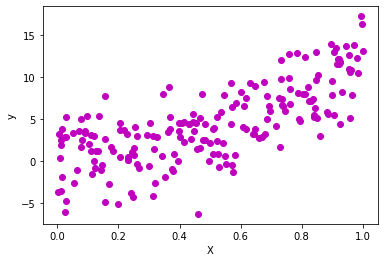

In [3]:
plt.plot(x, y, 'mo')
plt.xlabel('X')
plt.ylabel('y')

In [4]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [5]:
model = LinearRegression(normalize=True)

In [6]:
model.fit(X_train, y_train)
print('w=', model.coef_, '\tintercept=', model.intercept_)

w= [[-3.94817909 11.62480565 -7.08010187  2.82049367]] 	intercept= [4.19791905]


In [7]:
print('test score:', model.score(X_test, y_test))
print('train score:', model.score(X_train, y_train))

test score: 0.6607436016246049
train score: 0.5482346815082813


In [8]:
h_train = model.predict(X_train)
MSE_train = np.mean((y_train - h_train) ** 2) / 2
h_test = model.predict(X_test)
MSE_test = np.mean((y_test - h_test) ** 2) / 2
print('train MSE=', MSE_train, ', test MSE=', MSE_test)

train MSE= 4.548501841299351 , test MSE= 4.144111875772852


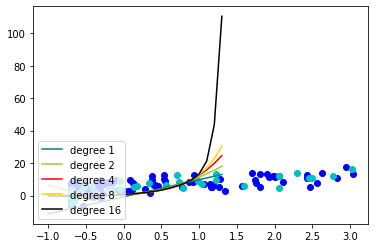

In [9]:
#x_line = np.arange(-5, 6, 0.1).reshape(-1, 1)
#x_line_4 = np.hstack((x_line, x_line ** 2, x_line ** 3, x_line ** 4))
#y_line_4 = model.predict(x_line_4)

plt.plot(X_train[:, 0], y_train, 'bo')
plt.plot(X_test[:, 0], y_test, 'co')
#plt.plot(x_line_4[:, 0], y_line_4, 'r--')

x_plot = np.arange(-1, 1.4, 0.1).reshape(-1, 1)
X_plot = x_plot[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'red', 'gold', 'black']
for count, degree in enumerate([1, 2, 4, 8, 16]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x, y)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[count],
             label="degree %d" % degree)
plt.legend(loc='lower left')

w= [[3.17729195]] 	intercept= [4.19791905]
w= [[ 3.55951339 -0.25549822]] 	intercept= [4.19791905]
w= [[0.63332045 0.63332045 0.63332045 1.54040708]] 	intercept= [4.19791905]
w= [[0.18742079 0.18742079 0.18742079 0.18742079 0.18742079 0.18742079
  0.18742079 2.22977094]] 	intercept= [4.19791905]
w= [[0.0654957  0.0654957  0.0654957  0.0654957  0.0654957  0.0654957
  0.0654957  0.0654957  0.0654957  0.0654957  0.0654957  0.0654957
  0.0654957  0.0654957  0.0654957  2.62406113]] 	intercept= [4.19791905]


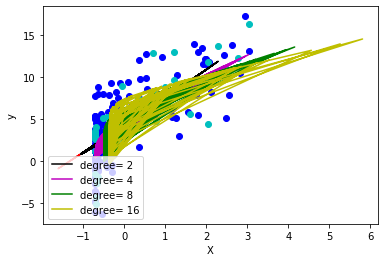

In [10]:
plt.plot(X_train[:, 0], y_train, 'bo')
plt.plot(X_test[:, 0], y_test, 'co')

MSE_train=[]
MSE_test=[]
X = x
X_train = X[:split]
X_test = X[split:]
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
print('w=', model.coef_, '\tintercept=', model.intercept_)
h_train = model.predict(X_train)
mse_train = np.mean((y_train - h_train) ** 2) / 2
MSE_train.append(mse_train)
h_test = model.predict(X_test)
mse_test = np.mean((y_test - h_test) ** 2) / 2
MSE_test.append(mse_test)
#print('for degree= ', i, 'train MSE=', mse_train, ', test MSE=', mse_test)
plt.plot(X_train[:, 0], h_train, 'r-')

degree = [2, 4, 8, 16]
for n in range(4):
    i = degree[n]
    for m in range(2, i+1):
        X = np.hstack((x**i, X))
    split = int(X.shape[0] * 0.8)
    X_train = X[:split]
    #y_train = y[:split]
    X_test = X[split:]
    #y_test = y[split:]
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    model = LinearRegression(normalize=True)
    model.fit(X_train, y_train)
    print('w=', model.coef_, '\tintercept=', model.intercept_)
    h_train = model.predict(X_train)
    mse_train = np.mean((y_train - h_train) ** 2) / 2
    MSE_train.append(mse_train)
    h_test = model.predict(X_test)
    mse_test = np.mean((y_test - h_test) ** 2) / 2
    MSE_test.append(mse_test)
    #print('for degree= ', i, 'train MSE=', mse_train, ', test MSE=', mse_test)
    colors = ['k', 'm', 'g', 'y']
    plt.plot(X_train[:, 0], h_train, '-', color=colors[n], label='degree= {}'.format(i))
    X = x

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='lower left')

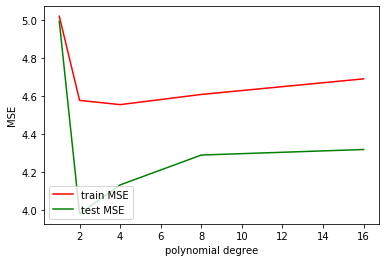

In [11]:
degree = [1, 2, 4, 8, 16]
plt.plot(degree, MSE_train,'r-' ,label='train MSE')
plt.plot(degree, MSE_test,'g-', label='test MSE')
plt.xlabel('polynomial degree')
plt.ylabel('MSE')
plt.legend(loc='lower left')

Text(0, 0.5, 'Score')

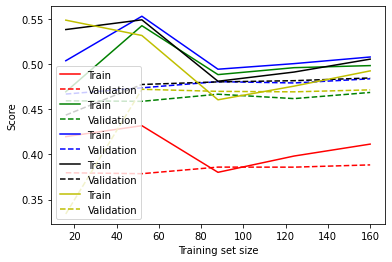

In [12]:
X = x
clf = LinearRegression()
train_sizes, train_score, test_score = learning_curve(clf, X, y, cv=5) 
plt.plot(train_sizes, train_score.mean(axis=1), 'r-', label='Train')
plt.plot(train_sizes, test_score.mean(axis=1), 'r--',label='Validation')

degree = [2, 4, 8, 16]
colors = ['g', 'b', 'k', 'y']
for n in range(4):
    i = degree[n]
    for m in range(2, i+1):
        X = np.hstack((x**i, X))
    clf = LinearRegression()
    train_sizes, train_score, test_score = learning_curve(clf, X, y, cv=5)
    plt.plot(train_sizes, train_score.mean(axis=1), '-', color=colors[n], label='Train')
    plt.plot(train_sizes, test_score.mean(axis=1), '--', color=colors[n], label='Validation')
    X = x
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Score')